In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# Método Euler 
def euler(dydx,x,paso):
    Y_E = [1,0,0,0,0,0,0,0,0]
    for k in range(len(x)-1):
        f = dydx(x[k])
        Y_E[k+1] = (Y_E[k] + f*paso)
    return Y_E

# Metodo Heun
def Heun(dydx,x,paso):
    Y_H = [1,0,0,0,0,0,0,0,0]
    for k in range(len(x)-1):
        f1 = dydx(x[k])
        f2= dydx(x[k+1])
        Y_H[k+1] = (Y_H[k] + ((f1+f2)/2)*paso)
    return Y_H

# Método RK3
def RK3(dydx,x,paso):
    Y_RK_3 = [1,0,0,0,0,0,0,0,0]
    for k in range(len(x)-1):
        k1 = dydx(x[k])
        k2 = dydx(x[k]+(paso/2))
        k3 = dydx(x[k]+paso)
        Y_RK_3[k+1] = Y_RK_3[k] + (k1 + 4*k2 + k3) * (paso/6)
    return Y_RK_3

# Método RK4
def RK4(dydx,x,paso):
    Y_RK_4 = [1,0,0,0,0,0,0,0,0]
    for k in range(len(x)-1):
        k1 = dydx(x[k])
        k2 = dydx(x[k]+(paso/2))
        k3 = dydx(x[k]+(paso/2))
        k4 = dydx(x[k]+paso)
        Y_RK_4[k+1] = Y_RK_4[k] + (k1 + 2*k2 + 3*k3 + k4) * (paso/6)
    return Y_RK_4


In [3]:

def dydx(x):
  return -2*(pow(x,3)) + 12*(pow(x,2) ) -20*(x) + 8.5
# Solucion Exacta
def y_x(x):
  return -0.5*(pow(x,4)) + 4*(pow(x,3) ) -10*(pow(x,2) ) +8.5*(x) + 1
# Error Truncamiento
def d1y(x):
  return -6*pow(x,2) + 24*(x) -20
def d2y(x):
  return -12*(x) + 24
def d3y(x):
  return -12

In [4]:
# Para graficado de solucion exacta
x_plot = np.arange(0, 4.01, 0.01)
y_plot = y_x(x_plot)

# Valores iniciales
paso = 0.5
x = np.arange(0, 4.5, paso)

# Para tabla de solucion exacta
Y_v = y_x(x)#solucion verdadera
Y_E = euler(dydx,x,paso)#solucion de Euler
# Error Global
E_GE = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)):
  E_GE[k] = round(((Y_v[k]-Y_E[k])/Y_v[k])*100,1)

# Error Local
E_LE = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)-1):
  E_LE[k+1] = round((((Y_v[k]-Y_E[k])-(Y_v[k+1]-Y_E[k+1]))/(Y_v[k+1]))*-100,2)

# Error Trunc
E_T = [0,0,0,0,0,0,0,0,0]
for k in range(len(x)):
  E_T[k] = (d1y(x[k])/2) * (pow(paso,2))
  E_T[k] = E_T[k] + (d2y(x[k])/6)*(pow(paso,3))
  E_T[k] = round(E_T[k] + (d3y(x[k])/24)*(pow(paso,4)),1)

# Tabla
df_e = pd.DataFrame({'x':x,'y verd':Y_v , 'y Euler':Y_E, 'Error Global Euler':E_GE, 'Error Local Euler':E_LE,'Error Trunc':E_T})
print(df_e)

     x   y verd  y Euler  Error Global Euler  Error Local Euler  Error Trunc
0  0.0  1.00000    1.000                 0.0               0.00         -2.0
1  0.5  3.21875    5.250               -63.1             -63.11         -0.8
2  1.0  3.00000    5.875               -95.8             -28.12         -0.0
3  1.5  2.21875    5.125              -131.0              -1.41          0.4
4  2.0  2.00000    4.500              -125.0              20.31          0.5
5  2.5  2.71875    4.750               -74.7              17.24          0.2
6  3.0  4.00000    5.875               -46.9               3.91         -0.5
7  3.5  4.71875    7.125               -51.0             -11.26         -1.6
8  4.0  3.00000    7.000              -133.3             -53.12         -3.0


In [5]:
# Para graficado de solucion exacta
x_plot = np.arange(0, 4.01, 0.01)
y_plot = y_x(x_plot)

# Valores iniciales
paso = 0.5
x = np.arange(0, 4.5, paso)

# Para tabla de solucion exacta
Y_v = y_x(x)#Solucion exacta
Y_H = Heun(dydx,x,paso)#solucion heun

# Error Global
E_GH = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)):
  E_GH[k] = round(((Y_v[k]-Y_H[k])/Y_v[k])*100,1)

# Error Local
E_LH = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)-1):
  E_LH[k+1] = round((((Y_v[k]-Y_H[k])-(Y_v[k+1]-Y_H[k+1]))/(Y_v[k+1]))*-100,2)

# Error Trunc
E_T = [0,0,0,0,0,0,0,0,0]
for k in range(len(x)):
  E_T[k] = (d1y(x[k])/2) * (pow(paso,2))
  E_T[k] = E_T[k] + (d2y(x[k])/6)*(pow(paso,3))
  E_T[k] = round(E_T[k] + (d3y(x[k])/24)*(pow(paso,4)),1)

# Tabla
df_h = pd.DataFrame({'x':x,'y verd':Y_v , 'y Heun':Y_H, 'Error Global Heun':E_GH, 'Error Local Heun':E_LH,'Error Trunc':E_T})
print(df_h)


     x   y verd  y Heun  Error Global Heun  Error Local Heun  Error Trunc
0  0.0  1.00000  1.0000                0.0              0.00         -2.0
1  0.5  3.21875  3.4375               -6.8             -6.80         -0.8
2  1.0  3.00000  3.3750              -12.5             -5.21         -0.0
3  1.5  2.21875  2.6875              -21.1             -4.23          0.4
4  2.0  2.00000  2.5000              -25.0             -1.56          0.5
5  2.5  2.71875  3.1875              -17.2              1.15          0.2
6  3.0  4.00000  4.3750               -9.4              2.34         -0.5
7  3.5  4.71875  4.9375               -4.6              3.31         -1.6
8  4.0  3.00000  3.0000                0.0              7.29         -3.0


In [6]:
x_plot = np.arange(0, 4.01, 0.01)
y_plot = y_x(x_plot)

# Valores iniciales
paso = 0.5
x = np.arange(0, 4.5, paso)

# Para tabla de solucion exacta
Y_v = y_x(x)#Solucion exacta
Y_RK_3 = RK3(dydx,x,paso)#Salucion rk3

# Error Global
E_GRK3 = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)):
  E_GRK3[k] = round(((Y_v[k]-Y_RK_3[k])/Y_v[k])*100,1)

# Error Local
E_LRK3 = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)-1):
  E_LRK3[k+1] = round((((Y_v[k]-Y_RK_3[k])-(Y_v[k+1]-Y_RK_3[k+1]))/(Y_v[k+1]))*-100,2)

# Error Trunc
E_T = [0,0,0,0,0,0,0,0,0]
for k in range(len(x)):
  E_T[k] = (d1y(x[k])/2) * (pow(paso,2))
  E_T[k] = E_T[k] + (d2y(x[k])/6)*(pow(paso,3))
  E_T[k] = round(E_T[k] + (d3y(x[k])/24)*(pow(paso,4)),1)

# Tabla
df_h = pd.DataFrame({'x':x,'y verd':Y_v , 'y RK 3°':Y_RK_3, 'Error Global RK 3°':E_GRK3, 'Error Local RK 3°':E_LRK3,'Error Trunc':E_T})
print(df_h)

     x   y verd  y RK 3°  Error Global RK 3°  Error Local RK 3°  Error Trunc
0  0.0  1.00000  1.00000                 0.0                0.0         -2.0
1  0.5  3.21875  3.21875                 0.0               -0.0         -0.8
2  1.0  3.00000  3.00000                 0.0               -0.0         -0.0
3  1.5  2.21875  2.21875                 0.0               -0.0          0.4
4  2.0  2.00000  2.00000                 0.0               -0.0          0.5
5  2.5  2.71875  2.71875                 0.0               -0.0          0.2
6  3.0  4.00000  4.00000                 0.0               -0.0         -0.5
7  3.5  4.71875  4.71875                 0.0               -0.0         -1.6
8  4.0  3.00000  3.00000                 0.0               -0.0         -3.0


In [7]:
x_plot = np.arange(0, 4.01, 0.01)
y_plot = y_x(x_plot)

# Valores iniciales
paso = 0.5
x = np.arange(0, 4.5, paso)

# Para tabla de solucion exacta
Y_v = y_x(x)#Solucion Exacta
Y_RK_4 = RK4(dydx,x,paso)#solucion rk4

# Error Global
E_GRK4 = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)):
  E_GRK4[k] = round(((Y_v[k]-Y_RK_4[k])/Y_v[k])*100,1)

# Error Local
E_LRK4 = [0,0,0,0,0,0,0,0,0]
for k in range (len(x)-1):
  E_LRK4[k+1] = round((((Y_v[k]-Y_RK_4[k])-(Y_v[k+1]-Y_RK_4[k+1]))/(Y_v[k+1]))*-100,2)

# Error Trunc
E_T = [0,0,0,0,0,0,0,0,0]
for k in range(len(x)):
  E_T[k] = (d1y(x[k])/2) * (pow(paso,2))
  E_T[k] = E_T[k] + (d2y(x[k])/6)*(pow(paso,3))
  E_T[k] = round(E_T[k] + (d3y(x[k])/24)*(pow(paso,4)),1)

# Tabla
df_h = pd.DataFrame({'x':x,'y verd':Y_v , 'y RK 4°':Y_RK_4, 'Error Global RK 4°':E_GRK4, 'Error Local RK 4°':E_LRK4,'Error Trunc':E_T})
print(df_h)

     x   y verd   y RK 4°  Error Global RK 4°  Error Local RK 4°  Error Trunc
0  0.0  1.00000  1.000000                 0.0               0.00         -2.0
1  0.5  3.21875  3.570312               -10.9             -10.92         -0.8
2  1.0  3.00000  3.302083               -10.1               1.65         -0.0
3  1.5  2.21875  2.382812                -7.4               6.22          0.4
4  2.0  2.00000  2.125000                -6.2               1.95          0.5
5  2.5  2.71875  2.966146                -9.1              -4.50          0.2
6  3.0  4.00000  4.468750               -11.7              -5.53         -0.5
7  3.5  4.71875  5.320312               -12.7              -2.81         -1.6
8  4.0  3.00000  3.333333               -11.1               8.94         -3.0


     x   y verd  y Euler  y Heun  y RK 3°   y RK 4°
0  0.0  1.00000    1.000  1.0000  1.00000  1.000000
1  0.5  3.21875    5.250  3.4375  3.21875  3.570312
2  1.0  3.00000    5.875  3.3750  3.00000  3.302083
3  1.5  2.21875    5.125  2.6875  2.21875  2.382812
4  2.0  2.00000    4.500  2.5000  2.00000  2.125000
5  2.5  2.71875    4.750  3.1875  2.71875  2.966146
6  3.0  4.00000    5.875  4.3750  4.00000  4.468750
7  3.5  4.71875    7.125  4.9375  4.71875  5.320312
8  4.0  3.00000    7.000  3.0000  3.00000  3.333333


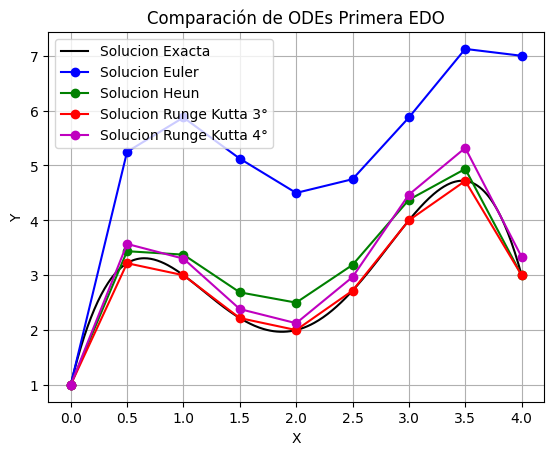

In [8]:
df_Metodos = pd.DataFrame({'x':x,'y verd':Y_v , 'y Euler':Y_E, 'y Heun':Y_H,'y RK 3°':Y_RK_3,'y RK 4°':Y_RK_4})
print(df_Metodos)

# Grafico
plt.figure(1)
plt.plot(x_plot, y_plot, 'black',label='Solucion Exacta')
plt.plot(x, Y_E, 'bo-',label='Solucion Euler')
plt.plot(x, Y_H, 'go-',label='Solucion Heun')
plt.plot(x, Y_RK_3, 'ro-',label='Solucion Runge Kutta 3°')
plt.plot(x, Y_RK_4, 'mo-',label='Solucion Runge Kutta 4°')
plt.title('Comparación de ODEs Primera EDO')
plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

   Error G Euler  Error G Heun  Error G RK 3°  Error G RK 4°
0            0.0           0.0            0.0            0.0
1          -63.1          -6.8            0.0          -10.9
2          -95.8         -12.5            0.0          -10.1
3         -131.0         -21.1            0.0           -7.4
4         -125.0         -25.0            0.0           -6.2
5          -74.7         -17.2            0.0           -9.1
6          -46.9          -9.4            0.0          -11.7
7          -51.0          -4.6            0.0          -12.7
8         -133.3           0.0            0.0          -11.1


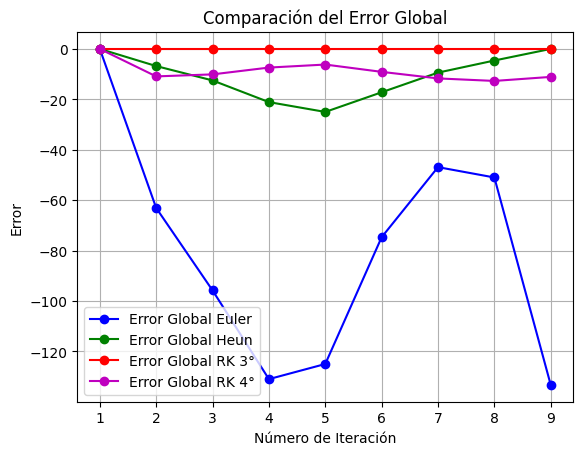

In [9]:
df_Errores = pd.DataFrame({'Error G Euler':E_GE,'Error G Heun':E_GH,'Error G RK 3°':E_GRK3,'Error G RK 4°':E_GRK4})
print(df_Errores)

# Error Global
plt.figure(2)
plt.plot(np.arange(1, 10),E_GE,'bo-',label='Error Global Euler')
plt.plot(np.arange(1, 10),E_GH,'go-',label='Error Global Heun')
plt.plot(np.arange(1, 10),E_GRK3,'ro-',label='Error Global RK 3°')
plt.plot(np.arange(1, 10),E_GRK4,'mo-',label='Error Global RK 4°')
plt.title('Comparación del Error Global')
plt.legend()
plt.xlabel('Número de Iteración')
plt.ylabel('Error')
plt.grid()
plt.show()